# Week 3 Notes
    整理ML:C2模型评估与选择笔记内容，新学习ML:C3线性模型内容。以后的笔记应该还是以“讲解”的视角去做，而不是单纯地整理概念，这样无论是再回看，还是写的过程都会更加有趣一些。
  
## ML C2 模型评估与选择
    本章解决的一个核心问题就是在于，以什么样的指标去选择模型，如何评估这些模型之间的好坏

### 2.1 经验误差与过拟合
* 训练误差、泛化误差
  - 误差：学习器预测输出 与 样本真实标记 之间的差异
  - 在训练集上的误差叫**训练误差**，在新样本上的误差叫**泛化误差**
  - 我们当然希望得到泛化误差小的学习器→但往往只能是使经验误差最小化
* 过拟合、欠拟合
  - 过拟合就好像书呆子、欠拟合就好像“井底之蛙”
![fitting](image/fitting.jpg)
  - 所以机械学习其实也可以理解为一个完全的过拟合？但似乎也不太准确hhh
  - 机器学习往往面临的都是NP难甚至更难，那么如果想在P层面完全避免过拟合，那么实际上我们就好像证明了P=NP，显然，至少目前这是很困难的一件事

### 2.2 评估方法
核心目标：我们希望学习器的泛化误差
<br>大思路：通过实验的方式测试这些泛化误差并选择→使用测试集进行测试
<br>而测试集尽量要和训练集互斥：这就好像老师不能用上课讲的10道例题做期末考试题一样
<br>所以我们需要将整个数据集划分为训练集S和测试集T，划分的方法主要有：留出法、交叉验证法和自助法

#### 2.2.1 留出法
核心思想：将数据集划分为两个互斥的集合，其中一个作为训练集S、另一个作为测试集T。
* 要尽可能保证数据分布的一致性，常用的方式是“分层采样”(stratified sampling)
* 即使划分的比例确定了，也存在多种划分方式：比如哪些正例作为测试集，哪些作为样本集，所以一般需要若干次随机划分、重复进行实验评估再取平均值，这才是留出法得到的评估结果。
* 这种方式有一个窘境在于：训练集部分划分的太大或太小——类似于过拟合的问题，所以往往训练集会占到全部样本的$\frac{2}{3}\sim\frac{4}{5}$

#### 2.2.2 交叉验证法
核心思想：将数据集D划分为k个大小相似的互斥子集，每次用k-1个作为训练集，k个作为测试集，最终返回结果的均值
* 因此亦叫k折交叉验证，通常取10，即10折交叉验证，其他常用如5、20等
* 同样地，即使确定了划分的k，仍然存在多种划分方式，所以也要做多次，叫做p次k折验证，例如常见的有10次10折交叉验证
* 若令k=样本数量，则得到了交叉验证法的一个特例：留一法（Leave-One-Out，简称LOO）
* 留一法的评估结果往往被认为是比较准确的（因为使用的样本数量只比原模型少一个）
* 但在数据集较大的情况下往往计算开销无法容忍，而且估计结果也未必更准确（NFL）

#### 2.2.3 自助法（其实很少用到了）
核心思想：保证训练集的大小和D一样（从而不被评估影响），于是相当于将m个样本拓展到2m个
* 相当于每次采样都做放回操作，重复m次得到一个大小为m的样本（显然有重复）D'，作为训练集
* 大约会有0.368的样本不会被采样到，用这一部分作为测试集。
<br>$$\lim _{m \rightarrow \infty}\left(1-\frac{1}{m}\right)^{m} = \frac{1}{e} \approx 0.368$$
* 这样的测试结果亦称包外估计（out-of-bag estimate）
* m不必很大就可以接近0.37。所以常用于数据集较小、难以有效划分的情况。（所以大数据时代也不咋用了）
* 缺点：改变了数据集的初始分布，引入了估计偏差

#### 2.2.4 调参与最终模型
调参指对算法参数进行设定，所以说和算法选择区别不大——但是并不是所有参数都可以训练出来，于是就需要手动调参
* 常见的做法是，对每个参数设定范围和变化步长，从这几个候选值当中选定值
* 当然了，即使这样工作量也还是很大的
最终模型：在选定模型之后，需要用数据集重新进行训练，再提交给用户
* 前边做的都是验证，最后才是交付，交付就要尽可能多用到数据
* 也有学者使用**验证集（validation set）**的概念用做模型评估与选择时的测试数据集，与实际使用时的测试集加以区分


### 2.3 性能度量
有了以上方法之后，就需要具体的评估指标来评价学习模型的泛化能力。这种评价标准就是**性能度量(performance measure)**。
回归任务最常用的性能度量是**均方误差(MSE, mean square error)**：
$$E(f ; D)=\frac{1}{m} \sum_{i=1}^{m}\left(f\left(\boldsymbol{x}_{i}\right)-y_{i}\right)^{2}$$
更一般地，对于数据分布$\mathcal{D}$和概率密度函数$p(·)$，MSE可描述为：
$$E(f ; \mathcal{D})=\int_{\boldsymbol{x} \sim \mathcal{D}}(f(\boldsymbol{x})-y)^{2} p(\boldsymbol{x}) \mathrm{d} \boldsymbol{x}$$
回归的都好说，那么接下来主要考虑**分类任务**中如何衡量性能度量。

#### 2.3.1 错误率与精度
* 错误率、精度（同样适用于多分类任务）
  - 错误率：分类错误的样本数占总数的比率
$$E(f ; D)=\frac{1}{m} \sum_{i=1}^{m} \mathbb{I}\left(f\left(\boldsymbol{x}_{i}\right) \neq y_{i}\right)$$
  - 精度：无论数据输入离散连续，都是 1-错误率
  - 对于离散的数据分布$\mathcal{D}$和概率密度函数$p(·)$而言，错误率公式为：
$$E(f ; \mathcal{D})=\int_{\boldsymbol{x} \sim \mathcal{D}} \mathbb{I}(f(\boldsymbol{x}) \neq y) p(\boldsymbol{x}) \mathrm{d} \boldsymbol{x}$$

#### 2.3.2 查全率、查准率与F1
* 查准率、查全率
错误率相当于把对的判错和错的判对一刀切了，不够精确，因此才产生了P(查准)、R(查全)
  - 查准率：Precision，正例里边有多准，即有多少正例是真正例；
  - 查全率：Recall，所有真实的正例，有多少被查出来了
  - 由此有一个混淆矩阵：
![confusion matrix](image/分类结果混淆矩阵.png)
  - 对应地有：（还是尽量去理解，不要死记公式）
$$P=\frac{T P}{T P+F P}，R=\frac{T P}{T P+F N}$$
  - 查准率与查全率往往是一堆矛盾：想查的准就很难查的全，想查的全就很难查的准（就好像抓间谍一样）。
* 查准查全的计算方式：
  - 先排列，把最可能是正例的排在前面，最不可能的排到后面这样依次递减。
  - 然后逐个地画线，没有正例、仅有1个正例、2个、3个……全部是正例，相当于有m个样例就计算m+1（注意0个）次查全、查准率，最后平滑地把他们连起来。所以查全、查准率也是步进计算的。
  - 如果一个学习器的P-R曲线被另一个完全包住，那么后者的性能必然优于前者（相当于P、R双高）。
* 平衡点、F1
  - 平衡点（BEP, Break-Even Point）：查准率=查全率的取值。当两个学习器打的难舍难分的时候，往往看两者相等时的取值。
  - F函数解决的是，**在学习器、PR曲线确定之后，怎么取阈值最好的问题**（也即取P、R曲线的哪个点）。$\beta$的取值则考虑查准率和查全率之间的取舍，F函数使用加权调和平均：
  $$\frac{1}{F(\beta)}=\frac{1}{1+\beta^{2}} \cdot\left(\frac{1}{P}+\frac{\beta^{2}}{R}\right)$$
  化简后有：
$$F(\beta)=\frac{\left(1+\beta^{2}\right) \times P \times R}{\left(\beta^{2} \times P\right)+R}$$
  - $\beta$反映了我们对于 查准率/查全率 这个比值的偏好程度。因为$\beta$加在了调和平均R的头上，P、R都在分母上，所以如果$\beta<1$则P越小越好、R越大越好、也即P/R越小越好；$\beta>1$则P越小越好、R越大越好，也即P/R越小越好（但总之这些都是相对的，如果P、R都能提高那才是硬道理）。
  - F函数中常取的是F1，就是纯调和平均：
  $$\frac{1}{F 1}=\frac{1}{2} \cdot\left(\frac{1}{P}+\frac{1}{R}\right)$$
  化简后有：
  $$F 1=\frac{2 \times P \times R}{P+R}=\frac{2 \times T P}{\text { 样例总数 }+T P-T N}$$
  - 往往随着阈值的变化，F函数的值也会先增再减，那么此时就取F值最大的那个阈值，就是最佳的预测模型。
![confusion matrix](image/F1.gif)
此外，关于P、R、F1的理解，可以参见这篇知乎：https://zhuanlan.zhihu.com/p/92218196 总之要动态地理解P、R、F1。

#### 2.3.3 ROC与AUC
与P-R曲线类似，ROC的操作过程也是一样的，只是ROC考虑的是TPR、FPR。
* TPR、FPR
全是从混淆矩阵竖着看的，即分母都是真实值的总和
  - 真正例率（TPR，True Positive Rate）：**TPR的值和查全率是一样的！！！** 所有正例当中有多少被预测出来了，所以也被称作敏感度（sensitivity）。
$$\mathrm{TPR}=\frac{T P}{T P+F N}$$
  - 假正例率（FPR，False Positive Rate）：所有预测的正例当中，假正例在全部反例中的比例，因而wiki上也叫它“false alarm”。
$$\mathrm{FPR}=\frac{F P}{T N+F P}$$
  - P、R的分子一样、分母也有交集（实际上都是分子）；而TPR、FPR是完全没有交集。
* ROC：受试工作者特征，Receiver Operating Characteristic
  - 纵轴是TPR、横轴是FPR。
![](image/ROC.png)
  - ROC图也是步进的，不过这种步进就显得更有节奏了：
<br>  随着阈值线不断向下，若当前为真正例，则y（TPR）步进$\frac{1}{m^+}$；若当前为假正例，则x（FPR）步进$\frac{1}{m^-}$。其中$m^+$、$m^-$分别对应正例和反例的总数（也即TPR、FPR的两个分母）。
  - AUC即Area Under Curve，ROC曲线下的面积：AUC可以一定程度上衡量模型的好坏，AUC越大越好（显然，如果一个ROC曲线包住了另一条，那么前者性能必然优于后者）。
  - 理解这一点可以从两个角度：
<br>  ①定性地理解：我们希望TPR尽快地攀升、同时又希望FPR不要攀升得那么快（false alarm），如果用抓间谍的例子来理解的话就是，我们希望更快地把全部间谍都抓到（这对应TPR的攀升），又希望少错杀一些同志（FPR不要攀升那么快），所以这对应的确实就是AUC。
<br>  ②定量地理解，引入$\ell_{rank}$表示这种排序错乱的误差、损失、惩罚。
$$\ell_{r a n k}=\frac{1}{m^{+} m^{-}} \sum_{\boldsymbol{x}^{+} \in D^{+}} \sum_{\boldsymbol{x}^{-} \in D^{-}}\left(\mathbb{I}\left(f\left(\boldsymbol{x}^{+}\right)<f\left(\boldsymbol{x}^{-}\right)\right)+\frac{1}{2} \mathbb{I}\left(f\left(\boldsymbol{x}^{+}\right)=f\left(\boldsymbol{x}^{-}\right)\right)\right)$$
    那么有：$AUC=1-\ell_{rank}$，也就是说其对应ROC之上的面积。那么要想误差越小，自然就要AUC越大。

#### 2.3.4 代价敏感错误率与代价曲线
目标：假正例（错的判对）与假反例（对的判错）的代价往往是不同的，比如对于患者的诊断。因而引入非均等代价。
* 引入代价矩阵：（多维情况可进一步拓展）
![](image/cm.png)
  - 通常来讲，$cost_{ii}=0$。
  - 故，对应地，“代价敏感”(cost-sensitive)错误率为：
$$
E(f ; D ; \cos t)= \frac{1}{m}\left(\sum_{\boldsymbol{x}_{i} \in D^{+}} \mathbb{I}\left(f\left(\boldsymbol{x}_{i}\right) \neq y_{i}\right) \times cos t_{01}\right.
\left.+\sum_{\boldsymbol{x}_{i} \in D^{-}} \mathbb{I}\left(f\left(\boldsymbol{x}_{i}\right) \neq y_{i}\right) \times cos t_{10}\right)
$$
* 非均等代价下，ROC曲线不能直接反映出学习器的期望总体代价，而代价曲线可达到该目的
  - 计算代价曲线的步骤是：同样是步进划线，ROC曲线上的每一个点都对应代价曲线上的每一条直线
  - 对于每一个ROC点，计算此时的FPR、FNR（毕竟代价曲线只考虑错误的代价），绘制(0, FPR)→(1,FNR)的许多条直线
  - 此时的AUC即为期望总体代价
![](image/代价曲线.png)

### 2.4 假设检验
总的来讲，此节是在讲如何通过实验来确定学习器的性能好坏。此时假设检验就是一个比较好的手段：即从概率上讲，A的泛化性能是否优于B，以及这个结论的把握有多大。
目前理解的还不够，暂略。

### 2.5 偏差与方差
除了通过实验可以从统计学角度比较两个学习器的泛化能力之外，人们还想知道“为什么”具有这样的泛化性能。“偏差-方差分解”(bias-variance decomposition)是一种重要工具。通过数学的推导，可以证明：
$$E(f ; D)=\operatorname{bias}^{2}(\boldsymbol{x})+\operatorname{var}(\boldsymbol{x})+\varepsilon^{2}$$
也就是说，**泛化误差可分解为偏差、方差和噪声之和**。
* 一般来讲，偏差与方差室友冲突的，这称为偏差-方差窘境
* 对应地有如下曲线：对应着从欠拟合到过拟合
![](image/泛化误差.png)


## ML C3 线性模型
首先要把握的是本章的一个脉络：其实读了两三遍、查了很多资料之后就会发现周老师写这一章确实是很用心、很有想法的，写得确实好。
<br>3.1节首先给出基本形式；3.2节先讨论如何在回归问题中建立线性模型（这也比较符合直觉）；3.3节从回归任务拓展到分类任务，并介绍了一种常见的二分类任务模型：对数几率回归；3.4节给出了另外一种二分类任务的处理方法，并且亦可拓展到多分类任务；3.5节最终将二分类任务拓展到多分类任务，即如何将多分类任务转化为二分类任务并解决之；最后3.6节给出了一些补充的关于类别不平衡问题的处理方式。

### 3.1 基本形式
事实上，线性模型在生活当中很常用，比如“三分天注定，七分靠打拼”这样的说法实际上就是一个线性模型。大概这也是线性模型“可理解性”的根基。
* 直接给出多属性（多维）的线性模型：
$$f(\boldsymbol{x})=w_{1} x_{1}+w_{2} x_{2}+\ldots+w_{d} x_{d}+b$$
* 或常用向量形式写成：
$$f(\boldsymbol{x})=\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}+b$$
* 所以整个线性模型的建立，其核心就在于找到一个合适的$\boldsymbol{w}$和$b$（也就是所谓的线性拟合）。

### 3.2 线性回归
对于回归任务，其输出是连续的（或者说是0到1之间的任意数），输入并不一定。通常可以将语言模糊化，比如输入高、中、低分别转化为{1, 0.5, 0}。
* 先捏个软柿子，考虑仅有一个属性输入的情况（此时总维度就是二维的，对应一个平面），此时线性模型可表示为：
$$f\left(x_{i}\right)=w x_{i}+b, \text { 使得 } f\left(x_{i}\right) \simeq y_{i}$$
* 给一个例子可能会显得不那么抽象一些，考虑学生学习时长与成绩的关系：

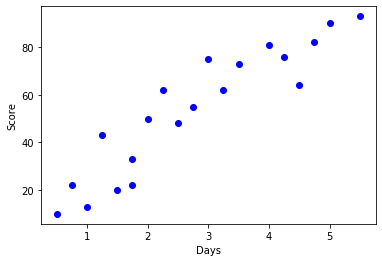

In [3]:
#OrderedDict,实现了对字典对象中元素的排序。
from collections import OrderedDict
import pandas as pd

#数据集
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,
            2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '分数':[10,  22,  13,  43,  20,  22,  33,  50,  62,  
              48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]}
examOrderDict=OrderedDict(examDict)
examDf=pd.DataFrame(examOrderDict)

#查看数据集前5行
examDf.head()


#提取特征和标签
#特征features
exam_X = examDf.loc[:,'学习时间']
#标签labes
exam_Y = examDf.loc[:,'分数']

#绘制散点图
import matplotlib.pyplot as plt

#散点图
plt.scatter(exam_X, exam_Y, color="b", label="exam data")

#添加图标标签
plt.xlabel("Days")
plt.ylabel("Score")
#显示图像
plt.show()

那么如果我们尝试对这个数据集建立线性模型，无非就是找到一条直线能够很好地拟合这些点。
* 这种拟合的依据有很多，其中比较常用的方式是高斯、勒让德等人提出的最小二乘法(least square error)，二乘就是平方的意思，台湾直接翻译成最小平方法，这种方式使用欧氏距离，通过平方的方式以消除负值带来的影响，那么也就是有：
$$
\begin{aligned}
\left(w^{*}, b^{*}\right) &=\underset{(w, b)}{\arg \min } \sum_{i=1}^{m}\left(f\left(x_{i}\right)-y_{i}\right)^{2} \\
&=\underset{(w, b)}{\arg \min } \sum_{i=1}^{m}\left(y_{i}-w x_{i}-b\right)^{2}
\end{aligned}
$$
* 不适用欧氏距离拟合的也有，比如最小绝对值法：
$$\mathrm{MAE}=\frac{\sum_{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|}{n}$$
* 显然，最小二乘法的拟合是唯一的，拟合效果更好（最小绝对值法遇到0，2，0，2这种数据，就拟合到0-2之间任一个数都可以，而最小二乘法就只会给出1，这种约束性更强），但是最小二乘法对于异常值的扰动比较大。
* 另一种Huber Loss结合了两者的优点，设定了一个阈值，在此阈值以下使用最小二乘，在此阈值以上使用绝对值法并减去一个平方量，这种方式也叫SMAE：
$$\mathrm{SMAE}_{i}=\left\{\begin{array}{ll}
\frac{1}{2}\left(y_{i}-\hat{y}_{i}\right)^{2}, & \text { when }\left|y_{i}-\hat{y}_{i}\right|<\delta, \\
\delta\left|y_{i}-\hat{y}_{i}\right|-\frac{1}{2} \delta^{2}, & \text { otherwise }
\end{array}\right.，{\mathrm{SMAE}}=\frac{\sum \mathrm{SMAE}_{i}}{n}$$
* 这些都是线性回归问题（甚至不止于此）当中的损失函数，像最小二乘也被称为L2损失，最小绝对值也被称为L1损失（对应他们的范数）。Huber损失虽然结合了两者的优点，但是引入了未知参数delta，故也需要额外的约束条件。

之后我们考虑多元的线性回归问题，此时我们并不只输入一个属性，而是多个属性，对应地有：
$$f\left(\boldsymbol{x}_{i}\right)=\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{i}+b, \text { 使得 } f\left(\boldsymbol{x}_{i}\right) \simeq y_{i}$$
考虑把b融合进w中，并将x和y都划为向量的形式有：
$$\hat{\boldsymbol{y}}=\mathbf{X} \hat{\boldsymbol{w}}$$
其中，
$$\hat{\boldsymbol{y}}=(\hat{y_{1}} ; \hat{y_{2}} ; \ldots ; \hat{y_{m}})$$
$$\mathbf{X}=\left(\begin{array}{ccccc}
x_{11} & x_{12} & \dots & x_{1 d} & 1 \\
x_{21} & x_{22} & \dots & x_{2 d} & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
x_{m 1} & x_{m 2} & \dots & x_{m d} & 1
\end{array}\right)=\left(\begin{array}{ccc}
x_{1}^{\mathrm{T}} & 1 \\
x_{2}^{\mathrm{T}} & 1 \\
\vdots & \vdots \\
x_{m}^{\mathrm{T}} & 1
\end{array}\right)$$
$$\hat{\boldsymbol{w}}=(\boldsymbol{w} ; b)$$
利用最小二乘法可以得到：
$$\hat{\boldsymbol{w}}^{*}=\underset{\hat{\boldsymbol{w}}}{\arg \min }(\boldsymbol{y}-\mathbf{X} \hat{\boldsymbol{w}})^{\mathrm{T}}(\boldsymbol{y}-\mathbf{X} \hat{\boldsymbol{w}})$$
关于此式为什么是最小二乘法，可以逐一解读如下图：
![](image/lse解读.png)
对此式进行求导后可以得到最小二乘法的**正规方程(normal equation)**：
$$\hat{\boldsymbol{w}}^{*}=\left(\mathbf{X}^{\mathrm{T}} \mathbf{X}\right)^{-1} \mathbf{X}^{\mathrm{T}} \boldsymbol{y}$$
那么就有必要讨论这个$X^{-1}X$是不是可逆的了。然而很不幸，在现实情况中，往往不可逆，如果样本比属性多，那么我们倒还可以砍掉一些样本，但如果要确定的属性比样本还要多，那么就不可逆需要进一步处理了。
<br>事实上这也对应着前面讲到的归纳偏好问题，常见的方式是通过正则化处理。
* 再进一步推广，可以得到广义线性模型。即函数在某一更广泛的尺度上变化，但我们可以将之转化为线性模型处理，也即：
$$y=g^{-1}\left(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}+b\right)$$
这里的g(·)被称为“联系函数”(link function)。

### 3.3 对数几率回归
这一节主要讲如何用回归模型解决分类问题，即通过一种转化的方式，将回归的预测值转化为分类。
* 最简单、直观的当然是单位阶跃函数（也叫Heaviside函数）：
$$y=\left\{\begin{array}{cc}
0, & z<0 \\
0,5, & z=0 \\
1, & z>0
\end{array}\right.$$
但是这个函数问题在于，螃蟹虽然好吃，可没有第一个吃螃蟹的人。这个函数不连续，无法求导，也就无法确定w和b的取值，也就是说我们事实上学习不出来wx+b。
* 于是对数几率函数就成为一个很好的选择（也是Sigmoid函数的一种）：
$$y=\frac{1}{1+e^{-z}}$$
之所以叫对数几率是因为，如果我们对它进行数学处理，就会得到
$$\ln \frac{y}{1-y}=w^{\mathrm{T}} x+b$$
而y/1-y恰反映了整理可能性与反例可能性的比值，所以叫“对数几率”。
* 那么接下来我们就需要确定w和b：这里区别于回归任务中使用最小二乘法，分类任务（显然不再适合最小二乘）可以引入概率的方式来确定w和b，将y和1-y对应地修改为$p(y=1 \mid \boldsymbol{x})$和$p(y=0 \mid \boldsymbol{x})$，显然这两者非黑即白，两者总和为1。
* 于是可以进一步进行数学处理，使用最大似然法得到取对数的最大似然函数：
$$\ell(\boldsymbol{w}, b)=\sum_{i=1}^{m} \ln p\left(y_{i} \mid \boldsymbol{x}_{i} ; \boldsymbol{w}, b\right)$$
进一步变形：
![](image/进一步变形.png)
最终得到：
$$\boldsymbol{\beta}^{*}=\underset{\boldsymbol{\beta}}{\arg \min } \ell^{\prime}(\boldsymbol{\beta})
，\ell^{\prime}(\boldsymbol{\beta})=\sum_{i=1}^{m}\left(-y_{i} \boldsymbol{\beta}^{\mathrm{T}} \hat{\boldsymbol{x}}_{i}+\ln \left(1+e^{\boldsymbol{\beta}^{\mathrm{T}} \hat{\boldsymbol{x}}_{i}}\right)\right)$$


### 3.4 线性判别分析
引入：仍然考虑一个二分类问题。
<br>在一个三维空间中，有一张桌子，其上放着一个苹果和一个橙子。
<br>已知苹果和橙子的点集（样本集），输入一个测试点（要么是苹果要么是橙子），如何判断其为苹果还是橙子？
![](image/苹果橙子.jpg)
而我们用这个视角去对苹果和橙子照相实际上就是一个将三维投降二维的过程，所以LDA的思想其实非常简单、易用：设法将样例投影到一条直线上，使得同类样例的投影点尽可能近、异类样例的投影点尽可能远离（对于更高维度，那么就是投影到低维超平面上）。
![](image/LDA.png)
* 二维LDA
<br>于是，得到这个二分类问题均值的投影和方差分别为：$\boldsymbol{w}^{\mathrm{T}} \boldsymbol{\mu}_{0}, \boldsymbol{w}^{\mathrm{T}} \boldsymbol{\mu}_{1}, \boldsymbol{w}^{T} \boldsymbol{\Sigma}_{0} \boldsymbol{w} \text { 和 } \boldsymbol{w}^{T} \boldsymbol{\Sigma}_{1} \boldsymbol{w}$
同样地，我们需要找到一个理论依据去确定w，这里做除法可以引入广义瑞利商以确定w：
$$\begin{aligned}
J &=\frac{\left\|\boldsymbol{w}^{\mathrm{T}} \boldsymbol{\mu}_{0}-\boldsymbol{w}^{\mathrm{T}} \boldsymbol{\mu}_{1}\right\|_{2}^{2}}{\boldsymbol{w}^{\mathrm{T}} \boldsymbol{\Sigma}_{0} \boldsymbol{w}+\boldsymbol{w}^{\mathrm{T}} \boldsymbol{\Sigma}_{1} \boldsymbol{w}} \\
&=\frac{\boldsymbol{w}^{\mathrm{T}}\left(\boldsymbol{\mu}_{0}-\boldsymbol{\mu}_{1}\right)\left(\boldsymbol{\mu}_{0}-\boldsymbol{\mu}_{1}\right)^{\mathrm{T}} \boldsymbol{w}}{\boldsymbol{w}^{\mathrm{T}}\left(\boldsymbol{\Sigma}_{0}+\boldsymbol{\Sigma}_{1}\right) \boldsymbol{w}}
\end{aligned}$$
分别定义类内散度矩阵和类间散度矩阵，可以得到广义瑞利商形式的损失函数，我们希望J越大越好：
$$J =\frac{\boldsymbol{w}^{\mathrm{T}} \mathbf{S}_{b} \boldsymbol{w}}{\boldsymbol{w}^{\mathrm{T}} \mathbf{S}_{w} \boldsymbol{w}}$$
根据瑞利商的性质（或使用拉格朗日乘子法推导），可以最终得到：
$$\boldsymbol{w}=\mathbf{S}_{w}^{-1}\left(\boldsymbol{\mu}_{0}-\boldsymbol{\mu}_{1}\right)$$
于是又变成了求逆问题的讨论。这里书上给出的是SVD分解（然而为什么不用LU分解等更多方阵分解方式呢？）。
* 多维LDA
在多维任务中，需要引入全局散度矩阵，将该类别的个数作为类间散度矩阵的权重，有：
$$\mathbf{S}_{w}=\sum_{i=1}^{N} \sum_{\boldsymbol{x} \in X_{i}}\left(\boldsymbol{x}-\boldsymbol{\mu}_{i}\right)\left(\boldsymbol{x}-\boldsymbol{\mu}_{i}\right)^{\mathrm{T}}$$
$$\mathbf{S}_{b}=\mathbf{S}_{t}-\mathbf{S}_{w}=\sum_{i=1}^{N} m_{i}\left(\boldsymbol{\mu}_{i}-\boldsymbol{\mu}\right)\left(\boldsymbol{\mu}_{i}-\boldsymbol{\mu}\right)^{\mathrm{T}}$$
并且常用迹作为目标函数的分子、分母：
$$\mathbf{W}=\max _{\mathbf{W}} \frac{\operatorname{tr}\left(\mathbf{W}^{\mathrm{T}} \mathbf{S}_{b} \mathbf{W}\right)}{\operatorname{tr}\left(\mathbf{W}^{\mathrm{T}} \mathbf{S}_{w} \mathbf{W}\right)}$$
这里W又称投影矩阵。因此LDA也常用于将多维降维的过程中，被视为一种经典的监督降维技术。

### 3.5 多分类学习
这同样是一种Redution的思想：将多分类学习转化为二分类问题并解决之。关于此部分可以见slides中的四大天王的例子更形象地理解。
* OvO、OvR和MvM
  - OvO：会产生$C_{n}^{2}=N(N-1) / 2$个二分类任务，N个类别两两配对：比如四种分类就对应6个任务。
  - OvR：亦称OvA，一个为正类，其余全为反类
  - MvM：通过某些特殊的设计构造正、反类（比如ECOC）。显然OvO和OvR都是MvM的特殊情况。
* OvO vs OvR
  - OvO的存储开销和测试时间开销通常比OvR大，但是在类别较多时训练时间开销通常更小；
  - OvO在训练时，每个分类器仅用到部分样例，OvR则为全部样例；
  - 多数情况下，两者预测性能差不多；
* ECOC编码长度
  - ECOC编码对分类器错误有一定的容忍和修正能力；
  - ECOC编码越长，纠错能力越强，但也意味着所需训练的分类器越多，计算、存储开销都会增大；
  - 组合数目也是有限的，码长超过一定范围后就失去了意义；
  - 通常，机器学习涉及很多因素，并不是说编码理论性质越好，分类性能越好。

### 3.6 类别不平衡问题
类别不平衡(class-imbalance)就是指分类任务中不同类别的训练样例数目差别很大的情况。
<br>比如对学习器输入了998份胃癌患者样例、2份非胃癌患者样例，那么如果我们不加以“再缩放”(rescaling)的话，学习器在拿到大部分新样本时，很可能都判以患者。所以rescaling解决的主要是“训练集未必是真实样本总体的无偏采样”的问题，很多时候我们也并不知道样本是不是无偏的。
* 再缩放：以对数几率模型为例
在对数几率模型中我们有：
$$\frac{p(y=1 \mid \boldsymbol{x})}{p(y=0 \mid \boldsymbol{x})}=e^{\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}+b}$$
$$\begin{aligned}
\frac{y^{\prime}}{1-y^{\prime}} &=\frac{p(y=1 \mid \boldsymbol{x})}{p(y=0 \mid \boldsymbol{x})} \times \frac{m^{-}}{m^{+}}=e^{\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}+b} \times \frac{m^{-}}{m^{+}} \\
&=e^{\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}+b} \times e^{\ln \frac{m^{-}}{m^{+}}}=e^{\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}+b+\ln \frac{m^{-}}{m^{+}}}
\end{aligned}$$
所以实际上，这个操作是在线性模型中附加了一个截距因子
* 对于类别不平衡问题，一般有三类做法
  - 欠采样(undersampling，也叫下采样)，去除一些反例使得正、反例数目接近，再学习。→时间开销较小，“全局来看不会丢失重要信息”，代表如EasyEnsemble；
  - 过采样(oversampling，也叫上采样)，增加一些正例使得正、反例数目接近，再学习。→不能简单地对初始样本重复采样，否则过拟合，可以通过插值，代表如SMOTE；
  - 阈值移动(threshold-moving)，即采用再缩放的基本策略。→也是代价敏感学习的基础。